In [1]:
import torch
import matplotlib.pyplot as plt

# Stochastic Gradient Desenct.

- In Stochastic gradient descent, we use one sample at a time.

- But, the problem with Stochastic Gradient Descent is the approximate cost will fluctuate rapidly.

# Example

In [2]:
X = torch.arange(-3.0, 3.0, 0.1).view(-1, 1)
f = -3 * X

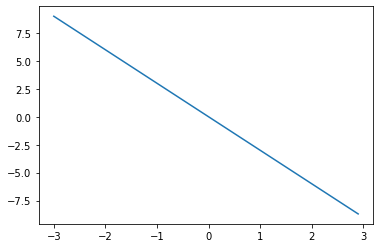

In [3]:
plt.plot(X.numpy(), f.numpy())
plt.show()

In [4]:
Y = f + 0.1 * torch.randn(X.size())

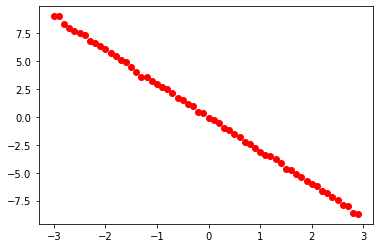

In [5]:
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

Decission function: $\hat{y} = wx + b$

Cost function: $\frac{1}{N}\sum_{n=1}^N (y_n - (wx_n + b))^2$

learning rate: $\eta = 0.1$

initial weight: $w_0 = 0$

initial bias: $b_0 = 0$

In [6]:
w = torch.tensor(0.0, requires_grad = True)
b = torch.tensor(0.0, requires_grad = True)

In [7]:
def forward(X):
    return w * X + b

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

**In Stochastic Gradient Descent, one epoch is not the same as one iteration**

In [8]:
lr = 0.1
COST = []
for epoch in range(4):
    total = 0
    for x, y in zip(X, Y):
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward()

        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()

        b.data = b.data - lr * b.grad.data
        b.grad.data.zero_()
        total += loss.item()
        
    COST.append(total)

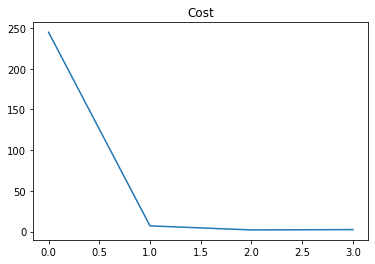

In [9]:
plt.plot(range(len(COST)), COST)
plt.title('Cost')
plt.show()

In [10]:
w

tensor(-2.8254, requires_grad=True)

In [11]:
b

tensor(0.0542, requires_grad=True)

# Dataset

In [12]:
from torch.utils.data import Dataset, DataLoader

In [13]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        f = -3 * self.x + 1
        self.y = f + 0.1 * torch.randn(X.size())
        
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [14]:
dataset = Data()

In [15]:
len(dataset)

60

In [16]:
x, y = dataset[0]

In [17]:
x

tensor([-3.])

In [18]:
y

tensor([9.9513])

In [19]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)

### Train with dataloader

In [20]:
w = torch.tensor(0.0, requires_grad = True)
b = torch.tensor(0.0, requires_grad = True)

In [21]:
lr = 0.1
COST = []
for epoch in range(4):
    total = 0
    for x, y in trainloader:
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward()

        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()

        b.data = b.data - lr * b.grad.data
        b.grad.data.zero_()
        total += loss.item()
        
    COST.append(total)

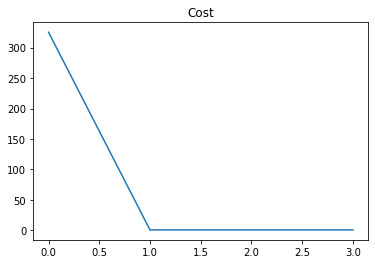

In [22]:
plt.plot(range(len(COST)), COST)
plt.title('Cost')
plt.show()

In [23]:
w

tensor(-3.0439, requires_grad=True)

In [24]:
b

tensor(0.9999, requires_grad=True)